In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
import spacy
spacy.cli.download("en_core_web_sm")
nlp=spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
pd.set_option('display.max_colwidth',None)
try:
    df=pd.read_csv('dataset.csv')
except FileNotFoundError:
    print("Error: dataset not found")
    display(df.head())

NameError: name 'pd' is not defined

In [8]:
print("\ndataset Information:")
df.info()



dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
print("\n sentiment distribution:")
print(df['sentiment'].value_counts())


 sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [11]:
stop_words=set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [13]:
def preprocess_text(text):
    text=re.sub(r'<,*7','',text)
    text=text.lower()
    tokens=word_tokenize(text)
    tokens=[word for word in tokens if word not in stop_words]
    text= ' '.join(tokens)
    doc=nlp(text)
    lemmatized_tokens=[token.lemma_ for token in doc]
    return ' '.join(lemmatized_tokens)

In [17]:
print("preprocessing all 50,000 reviews")
df= df.sample(500).copy()
df["cleaned_review"]=df['review'].apply(preprocess_text)
print("preprocessing complete")
print("\n comparing original vs cleaned review")
display(df[['review','cleaned_review']].head())

preprocessing all 50,000 reviews
preprocessing complete

 comparing original vs cleaned review


,review,cleaned_review
40182,"I couldn't agree more with the other comment, it's like Falling down. Peter Weller is OK and William Hurt great as always, except in Lost in Space. This is a good movie. With pretty good performances. Very recommendable. If you like Falling down you're going to enjoy this one. 8 of 10","could not agree comment , be like fall . peter weller ok william hurt great always , except lose space . good movie . pretty good performance . recommendable . like fall be going enjoy one . 8 10"
5734,"Now don't get me wrong I love bad movies... no I adore bad movies, Troll 2.... ouch painful, Manos The Hands of Fate... just watch Torgo go, Guru the Mad Monk.. is that traffic noise in the medieval background? OK so that's clear, but this is one of those films that was quite obviously trying to be something better, but didn't make it. Why not? Well it would be easy to blame the plot, but heh we've seen worse, there weren't too many holes and heh I know there's not a lot of originality in it but then that needn't kill a film. The effects aren't bad (if you completely ignore the last scene), the monster is OK, the truck quite menacing so where did it go wrong? Well I'd love to blame it on the 'Chris Moyles' look-a-like Harley... so I will! Comedy and horror are difficult to mix well, bad comedy and horror even worse and there's the problem. I loathed this guy from the moment he stuck his head up (literally), the continual bating of the overly meek Adam becomes annoying, so annoying that you lose belief that the mildest of people wouldn't react by pushing him out of the moving car door... and I thought it was the monster bits that the director was meant to have trouble convincing us of. Why are bad movies fun? Well you have great fun poking holes in them, laughing at the script, all the howlers etc. This film doesn't make the coveted category of 'Worst Movies' because its just bad due to being annoying nuff said. Don't bother, go watch anything else and you'll be a better person for it... I promise! (Fade to chants of Torgo Torgo Torgo)","not get wrong love bad movie ... adore bad movie , troll 2 .... ouch painful , mano hand fate ... watch torgo go , guru mad monk .. traffic noise medieval background ? ok 's clear , one film quite obviously try something well , not make . ? well would easy blame plot , heh ' ve see bad , not many hole heh know 's lot originality need not kill film . effect not bad ( completely ignore last scene ) , monster ok , truck quite menacing go wrong ? well would love blame ' chris moyle ' look - a - like harley ... ! comedy horror difficult mix well , bad comedy horror even bad 's problem . loathe guy moment stick head ( literally ) , continual bate overly meek adam become annoying , annoying lose belief mild people would not react push move car door ... think monster bit director mean trouble convince we . bad movie fun ? well great fun poking hole , laugh script , howler etc . film not make coveted category ' bad movie ' bad due annoying nuff say . not bother , go watch anything else will well person ... promise ! ( fade chant torgo torgo torgo )"
38079,"I found this to be a tremendously disappointing version of a charming story. I thought the acting was on the whole quite good. Reginald Owen did chew the scenery, as mentioned by others, but I found him moderately amusing in his brief scenes. TCM has made an Ann Harding fan of me, and I thought she was fine as usual here. Jessie Ralph had a field day as the old battleaxe, ordering everybody around, and Frank Morgan, as always, played Frank Morgan with a twinkle.<br /><br />For me, the problem was the script and/or the editing--transitions were awkward, motivations were murky. The movie was just too darned short to convey the story properly! I felt completely let down, particularly since I had such fond memories of the later version.","find tremendously disappointing version charming story . think act whole quite good . reginald owen chew sc

In [21]:
from sklearn.model_selection import train_test_split
df['sentiment_numeric'] = df['sentiment'].map({'positive':1, 'negative':0})
X=df['cleaned_review']
y=df['sentiment_numeric']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
print(f"training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

training set size: 400
Testing set size: 100


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
# max_features=5000 means we only use the 5000 most common words, which is efficient
tfidf = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf.fit_transform(X_train)

# ONLY transform the test data using the already-fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

print(f"Shape of the training TF-IDF matrix: {X_train_tfidf.shape}")
print(f"Shape of the testing TF-IDF matrix: {X_test_tfidf.shape}")

Shape of the training TF-IDF matrix: (400, 5000)
Shape of the testing TF-IDF matrix: (100, 5000)


In [24]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
# solver='liblinear' is a good choice for this type of problem
model = LogisticRegression(solver='liblinear')
model.fit(X_train_tfidf, y_train)

print("Model training complete!")

Model training complete!


In [25]:
def predict_sentiment(text):
    """
    Takes a raw text string and predicts its sentiment using the trained model.
    """
    # 1. Preprocess the text using the same function from Cell 2
    cleaned_text = preprocess_text(text)
    
    # 2. Vectorize the text using the SAME fitted TF-IDF vectorizer from Cell 5
    vectorized_text = tfidf.transform([cleaned_text])
    
    # 3. Predict using the trained model from Cell 6
    prediction = model.predict(vectorized_text)
    
    # 4. Return the human-readable result
    return 'Positive' if prediction[0] == 1 else 'Negative'

# --- Test Cases ---
review_1 = "This movie was absolutely fantastic! The acting was superb and the plot was gripping."
review_2 = "I was so bored throughout the entire film. It was a complete waste of time and money."
review_3 = "The film was okay, not great but not terrible either. Some parts were good."

print(f"Review: '{review_1}'\nPredicted Sentiment: {predict_sentiment(review_1)}\n")
print(f"Review: '{review_2}'\nPredicted Sentiment: {predict_sentiment(review_2)}\n")
print(f"Review: '{review_3}'\nPredicted Sentiment: {predict_sentiment(review_3)}\n")

Review: 'This movie was absolutely fantastic! The acting was superb and the plot was gripping.'
Predicted Sentiment: Positive

Review: 'I was so bored throughout the entire film. It was a complete waste of time and money.'
Predicted Sentiment: Negative

Review: 'The film was okay, not great but not terrible either. Some parts were good.'
Predicted Sentiment: Positive



Model Accuracy: 0.8300

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.72      0.80        46
    Positive       0.79      0.93      0.85        54

    accuracy                           0.83       100
   macro avg       0.84      0.82      0.82       100
weighted avg       0.84      0.83      0.83       100



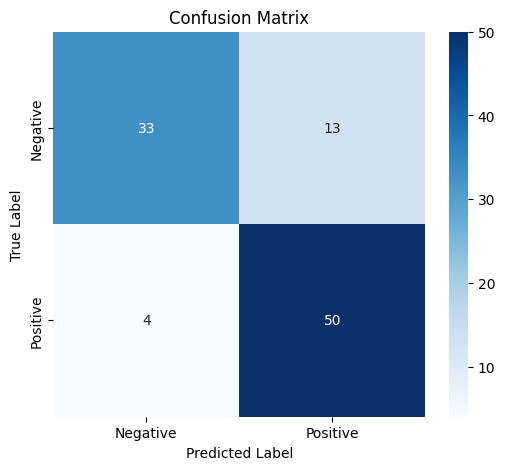

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()